In [2]:
import pylab as plt
import pandas as pd
import numpy as np

In [3]:
results_df = pd.read_csv('../raw/results_ours.csv')
results_df.columns = results_df.columns.str.strip()

In [4]:
iter_results_df = pd.read_csv('../raw/LOCAL_mnist_lenet_iter.csv')
iter_results_df.columns = iter_results_df.columns.str.strip()

In [5]:
results_df

,name,dataset,subnets,h_size,seed,acc,train_time,test_time
0,lenet-pae-elm,0,1,100,22,0.944200,2.605077,0.8403897285461426
1,lenet-pae-elm,0,1,100,432,0.948300,2.633287,0.828326940536499
2,lenet-pae-elm,0,1,100,63,0.947200,2.603533,0.8581714630126953
3,lenet-pae-elm,0,1,100,754,0.947200,2.605072,0.8289816379547119
4,lenet-pae-elm,0,1,100,3456,0.939300,2.627943,0.8271262645721436
...,...,...,...,...,...,...,...,...
515,lenet-pae-elm,2,5,900,5,0.898683,29.283124,6.209397554397583
516,lenet-pae-elm,2,5,900,6677,0.898930,29.460472,6.2222418785095215
517,lenet-pae-elm,2,5,900,876,0.894033,29.297101,6.224779844284058
518,lenet-pae-elm,2,5,900,213,0.883621,29.357852,6.239087343215942


In [8]:
ours_proc_df = results_df.drop(columns=['seed']).groupby(['dataset', 'subnets', 'h_size']).agg([np.mean,np.std])

/var/folders/mr/vnkbxhh151s11m2mmshdgq080000gn/T/ipykernel_46901/1671848631.py:1: FutureWarning: ['name', 'test_time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ours_proc_df = results_df.drop(columns=['seed']).groupby(['dataset', 'subnets', 'h_size']).agg([np.mean,np.std])


## Iterative LeNet

In [6]:
iter_proc_df = iter_results_df.drop(columns=['seed']).groupby('epochs').agg([np.mean,np.std])
iter_proc_df

/var/folders/mr/vnkbxhh151s11m2mmshdgq080000gn/T/ipykernel_46901/52109184.py:1: FutureWarning: ['name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  iter_proc_df = iter_results_df.drop(columns=['seed']).groupby('epochs').agg([np.mean,np.std])


acc           train_time           test_time     
           mean       std       mean       std      mean  std
epochs                                                       
1       0.97437  0.005867  12.261104  0.189363       0.0  0.0
2       0.97635  0.002448  35.488396  6.903013       0.0  0.0
3       0.97229  0.005034  61.873547  0.403400       0.0  0.0

## MNIST

In [56]:
neurons = [100,300,900]
subnets = [1,2,3,5,7,9]

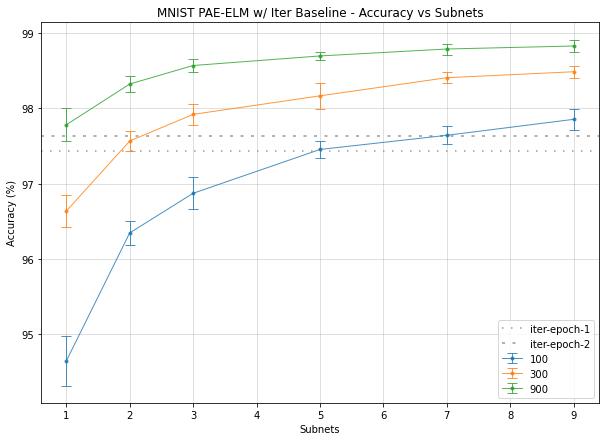

In [60]:
plt.figure(figsize=(10, 7))
plt.title('MNIST PAE-ELM w/ Iter Baseline - Accuracy vs Subnets')
plt.xlabel('Subnets')
plt.ylabel('Accuracy (%)')

for size in neurons:
    data = ours_proc_df.loc[0].loc[(slice(None), size), :]['acc']['mean'].values*100
    err = ours_proc_df.loc[0].loc[(slice(None), size), :]['acc']['std'].values*100
    plt.errorbar(subnets, data, yerr=err, fmt='o-', linewidth=1, markersize=3, alpha=0.8, capsize=5)

plt.axhline(iter_proc_df.iloc[0]['acc']['mean']*100, color='grey', linestyle=(0,(1,5)), alpha=0.8)
plt.axhline(iter_proc_df.iloc[1]['acc']['mean']*100, color='grey', linestyle=(0,(2,5)), alpha=0.8)

plt.grid(which='both', alpha=0.5)
plt.legend(['iter-epoch-1', 'iter-epoch-2']+neurons)

Results look very stable. Accuracies are fairly outstanding compared to the iterative networks. Divided parallel networks seem to have no benefit in terms of accuracies over training all neurons at once.

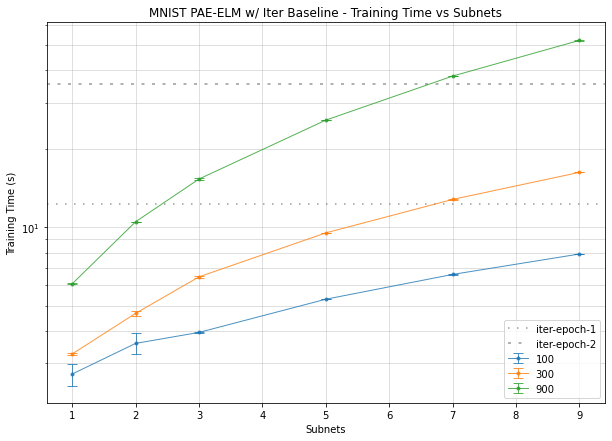

In [61]:
plt.figure(figsize=(10, 7))
plt.title('MNIST PAE-ELM w/ Iter Baseline - Training Time vs Subnets')
plt.xlabel('Subnets')
plt.ylabel('Training Time (s)')

for size in neurons:
    data = ours_proc_df.loc[0].loc[(slice(None), size), :]['train_time']['mean'].values
    err = ours_proc_df.loc[0].loc[(slice(None), size), :]['train_time']['std'].values
    plt.errorbar(subnets, data, yerr=err, fmt='o-', linewidth=1, markersize=3, alpha=0.8, capsize=5)

plt.axhline(iter_proc_df.iloc[0]['train_time']['mean'], color='grey', linestyle=(0,(1,5)), alpha=0.8)
plt.axhline(iter_proc_df.iloc[1]['train_time']['mean'], color='grey', linestyle=(0,(2,5)), alpha=0.8)

plt.yscale('log')
plt.grid(which='both', alpha=0.5)
plt.legend(['iter-epoch-1', 'iter-epoch-2']+neurons)

Training times are also fairly outstanding. Discovery of PLPool2d in pytorch helps shave off a lot of time. Again, no benefit in divided networks in terms of training times, but this could be changed if the classifiers inputs are trained in parallel rather than just having a parallel structure.

## Fashion MNIST

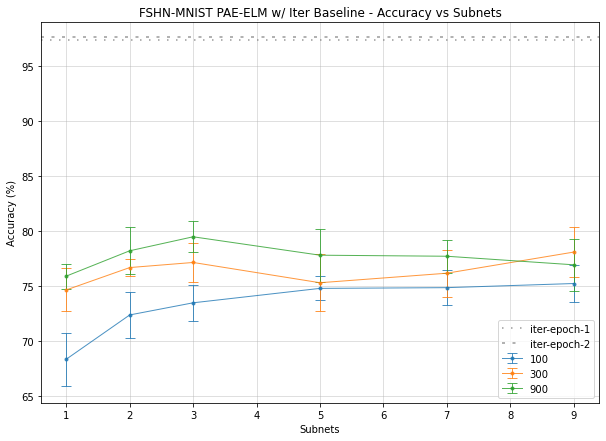

In [62]:
plt.figure(figsize=(10, 7))
plt.title('FSHN-MNIST PAE-ELM w/ Iter Baseline - Accuracy vs Subnets')
plt.xlabel('Subnets')
plt.ylabel('Accuracy (%)')

for size in neurons:
    data = ours_proc_df.loc[1].loc[(slice(None), size), :]['acc']['mean'].values*100
    err = ours_proc_df.loc[1].loc[(slice(None), size), :]['acc']['std'].values*100
    plt.errorbar(subnets, data, yerr=err, fmt='o-', linewidth=1, markersize=3, alpha=0.8, capsize=5)

plt.axhline(iter_proc_df.iloc[0]['acc']['mean']*100, color='grey', linestyle=(0,(1,5)), alpha=0.8)
plt.axhline(iter_proc_df.iloc[1]['acc']['mean']*100, color='grey', linestyle=(0,(2,5)), alpha=0.8)

plt.grid(which='both', alpha=0.5)
plt.legend(['iter-epoch-1', 'iter-epoch-2']+neurons)

On the contrary, these results are quite unstable. Some remarks:
- Growing number of subnets doesn't seem to be an effective strategy in this dataset
- The growth between 300 h_size and 900 h_size is not significant
- Actual iterative results are needed for comparison to see if model is unsuitable for dataset

Possible reasons for instablity:
- Reduced number of training samples
- Augmentation of input samples
- Bad model for dataset

Next steps:
- Compare results to iterative results
- Determine reasons for bad stability + performance
- Try new models and rerun tests

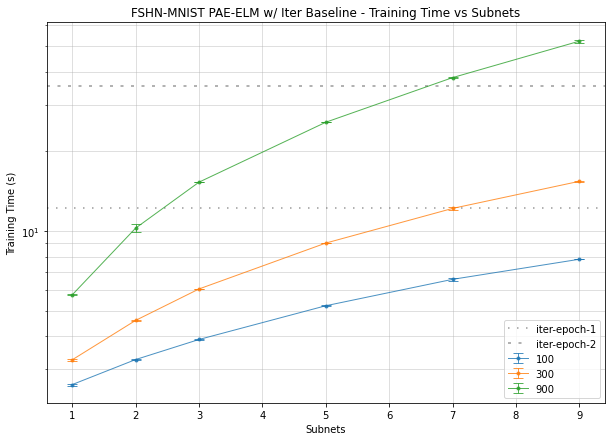

In [63]:
plt.figure(figsize=(10, 7))
plt.title('FSHN-MNIST PAE-ELM w/ Iter Baseline - Training Time vs Subnets')
plt.xlabel('Subnets')
plt.ylabel('Training Time (s)')

for size in neurons:
    data = ours_proc_df.loc[1].loc[(slice(None), size), :]['train_time']['mean'].values
    err = ours_proc_df.loc[1].loc[(slice(None), size), :]['train_time']['std'].values
    plt.errorbar(subnets, data, yerr=err, fmt='o-', linewidth=1, markersize=3, alpha=0.8, capsize=5)

plt.axhline(iter_proc_df.iloc[0]['train_time']['mean'], color='grey', linestyle=(0,(1,5)), alpha=0.8)
plt.axhline(iter_proc_df.iloc[1]['train_time']['mean'], color='grey', linestyle=(0,(2,5)), alpha=0.8)

plt.yscale('log')
plt.grid(which='both', alpha=0.5)
plt.legend(['iter-epoch-1', 'iter-epoch-2']+neurons)

## NORB

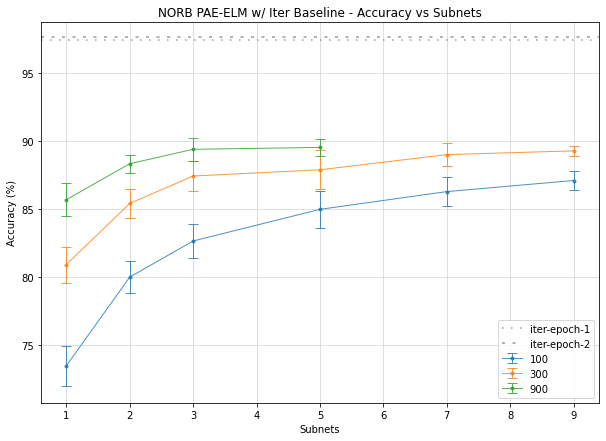

In [64]:
plt.figure(figsize=(10, 7))
plt.title('NORB PAE-ELM w/ Iter Baseline - Accuracy vs Subnets')
plt.xlabel('Subnets')
plt.ylabel('Accuracy (%)')

for size in neurons:
    data = ours_proc_df.loc[2].loc[(slice(None), size), :]['acc']['mean'].values*100
    err = ours_proc_df.loc[2].loc[(slice(None), size), :]['acc']['std'].values*100
    plt.errorbar(subnets[:len(data)], data, yerr=err, fmt='o-', linewidth=1, markersize=3, alpha=0.8, capsize=5)

plt.axhline(iter_proc_df.iloc[0]['acc']['mean']*100, color='grey', linestyle=(0,(1,5)), alpha=0.8)
plt.axhline(iter_proc_df.iloc[1]['acc']['mean']*100, color='grey', linestyle=(0,(2,5)), alpha=0.8)

plt.grid(which='both', alpha=0.5)
plt.legend(['iter-epoch-1', 'iter-epoch-2']+neurons)

Results look generally good for this dataset, although it would be good to get >90% accuracy. Some remarks:
- Execution stopped for 900 h_size with >5 subnets due to too memory issues
- For this dataset, parallel networks seemed to outperform non-parallel networks with the same complexity

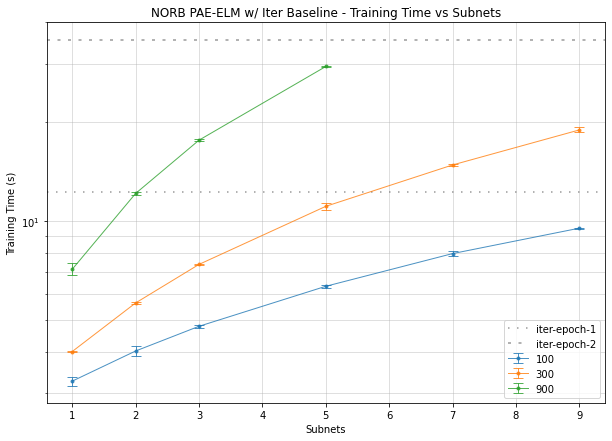

In [65]:
plt.figure(figsize=(10, 7))
plt.title('NORB PAE-ELM w/ Iter Baseline - Training Time vs Subnets')
plt.xlabel('Subnets')
plt.ylabel('Training Time (s)')

for size in neurons:
    data = ours_proc_df.loc[2].loc[(slice(None), size), :]['train_time']['mean'].values
    err = ours_proc_df.loc[2].loc[(slice(None), size), :]['train_time']['std'].values
    plt.errorbar(subnets[:len(data)], data, yerr=err, fmt='o-', linewidth=1, markersize=3, alpha=0.8, capsize=5)

plt.axhline(iter_proc_df.iloc[0]['train_time']['mean'], color='grey', linestyle=(0,(1,5)), alpha=0.8)
plt.axhline(iter_proc_df.iloc[1]['train_time']['mean'], color='grey', linestyle=(0,(2,5)), alpha=0.8)

plt.yscale('log')
plt.grid(which='both', alpha=0.5)
plt.legend(['iter-epoch-1', 'iter-epoch-2']+neurons)